# 1 聚类概述

**样本**
- 没有训练的样本
- 没有标注的样本

## 1.1 相似度度量

### 1.1.1 距离相似度度量
- 距离度量 $dist(o_{i},o_{j})$
    - 欧式距离
- 距离相似度度量
    $$sim(o_{i},o_{j})= \frac{1}{1+dist(o_{i},o_{j})}$$

### 1.1.2 密度相似性
- 体现的内涵:
    - (1)数据结构特性
    - (2)数据结构特性相似
- 密度: 单位空间内对象的个数
- 密度相似度定义: 设$c_{i},c_{j}点的密度为d_{i},d_{j}$ 
$$density(c_{i},c_{j})=|d_{i}-d_{j}|$$

### 1.1.3 连通相似性
- 定义:
    - 数据集用**图表示**, 节点是对象,边线是关系
    - 簇定义为**图的连接分支**

###  1.1.4 概念相似性独立
- 语义的相似性

## 1.2 质量评价指标
- 内部质量评价标准
    - CH指标
        - 簇间距离和簇内距离的比值
        - CH指标值越大 效果越高
- 外部质量评价标准
    - 纯度:取值范围小于1,越大越好

## 1.3 常用的聚类方法
### 1.3.1 按照聚类的度量

- 基于距离的聚类算法
- 基于密度的聚类算法
- 基于互连性的聚类算法

### 1.3.2 基于分析方法的思路
- 划分法: 
- 层次法: 
- 密度法:
- 网格法
- 模型法


# 2 层次聚类算法
## 2.1 层次聚类算法概述

    - 自顶向下:divisive
    - 自底向上:agglomerrative
    - 可以用树状图或者嵌套图表示
    - 类间距离度量:
        - 最短距离:最大相似度
        - 最长距离:最小相似度
        - 平均距离
        - 中心点距离

## 2.2 diana算法
### 2.2.1 diana算法简介
*自顶向下分裂*

- 输入： 包含n个点（对象）的数据集，簇的数目k。
- 输出： k个簇，达到终止条件规定簇数目

**度量方法**
- 簇的直径：在一个簇中的任意两个数据点的距离中的最大值
- 平均相异度（平均距离）

```伪代码
将所有对象整个当成一个初始簇;
将splinter group和old party两个对象集合置为空;
for (i=1; i≠k; i++)
{ 在所有簇中挑出具有最大直径的簇C;
找出C中与其他点平均相异度最大的一个点p;【离群点】
把p放入splinter group，剩余的点放在old party中；
do【离群点的吸引力】
{ 在old party里找出到splinter group中点的最近距离不大于到old party
中点的最近距离的点;
将该点加入splinter group;
} until (没有新的old party的点被分配给splinter group);
splinter group和old party为被选中的簇分裂成的两个簇，与其他簇一起
组成新的簇集合;
}
```

## 2.2 agnes算法
### 2.2.1 agnes算法简介
*自底向上凝聚*

```伪代码
输入： 包含n个点（对象）的数据集，簇的数目k。
输出： k个簇，达到终止条件规定簇数目。
方法： 其过程描述如下：
将每个点当成一个初始簇;
do
{ 根据两个簇中最近的数据点找到最近的两个簇;
合并两个簇，生成新的簇的集合;
} until (达到定义的簇的数目);
```

## 2.3 算法优缺点总结
-  简单，理解容易
-  合并点/分裂点选择不太容易
-  合并/分类的操作不能进行撤销
-  大数据集不太适合
-  执行效率较低O(t*n2)， t为迭代次数， n为样本点数。

# 3 划分法
*指定的聚类的数目和目标,通过反复迭代来进行优化*

## 3.1 K-均值
对于给定的样本集，按照样本之间的距离大小，将样本集划分为K个簇。让簇内的点尽量紧密的连在一起，而让簇间的距离尽量的大

### 3.3.1 K-均值聚类步骤
- 1.随机的选取K个中心点，代表K个类别；
- 2.计算N个样本点和K个中心点之间的欧氏距离；
- 3.将每个样本点划分到最近的（欧氏距离最小的）中心点类别中——迭代1；
- 4.计算每个类别中样本点的均值，得到K个均值，将K个均值作为新的中心点——迭代2；
- 5.重复步骤2、3、4；
- 6.满足收敛条件后，得到收敛后的K个中心点（中心点不再变化）

### 3.1.2 K值的选择
**注**:[引用自易学智能](https://www.easyaiforum.cn/case)
- 可视化数据，通过观察数据的聚合程度判断K值
- `K ≈ sqrt(N/2)`
- 拐点法：把聚类结果的F-test值（类间Variance和全局Variance的比值）对聚类个数的曲线画出来，选择图中拐点
- Silhouette法
- 交叉验证
- 核方法：构造Kernal矩阵，对其做eigenvalue decomposition，通过结果统计Compactness，获得Compactness—K曲线，选择拐点

### 3.1.3 代码实现

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

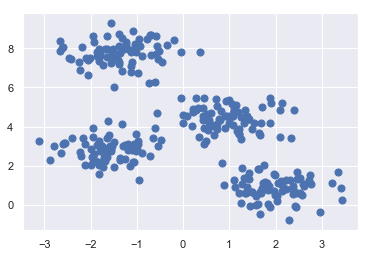

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [7]:
from sklearn.cluster import KMeans
"""
    KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300,
            tol=0.0001, precompute_distances='auto', verbose=0, 
            random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
        Parameters:
             n_clusters: 聚类个数
             max_iter：  最大迭代数
             n_init：    用不同的质心初始化值运行算法的次数
             init：      初始化质心的方法
             precompute_distances：预计算距离
             tol：       关于收敛的参数
             n_jobs：    计算的进程数
             random_state： 随机种子
             copy_x：是否修改原始数据
             algorithm：“auto”, “full” or “elkan”
                         ”full”就是我们传统的K-Means算法， 
                         “elkan”elkan K-Means算法。默认的
                         ”auto”则会根据数据值是否是稀疏的，来决定如何选择”full”和“elkan”,稠密的选 “elkan”，否则就是”full”
        Attributes：
             cluster_centers_：质心坐标
             Labels_: 每个点的分类 
             inertia_：每个点到其簇的质心的距离之和。 
"""
m_kmeans = KMeans(n_clusters=4)

**质心位置**:KMeans.cluster_centers_

In [14]:
from sklearn import metrics

def draw(m_kmeans,X,y_pred,n_clusters):
    centers = m_kmeans.cluster_centers_
    print(centers)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    #中心点（质心）用红色标出
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    print("Calinski-Harabasz score：%lf"%metrics.calinski_harabaz_score(X, y_pred) )
    plt.title("K-Means (clusters = %d)"%n_clusters,fontsize=20)

In [9]:
m_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
y_pred = m_kmeans.predict(X)

[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
Calinski-Harabasz score：1210.089914


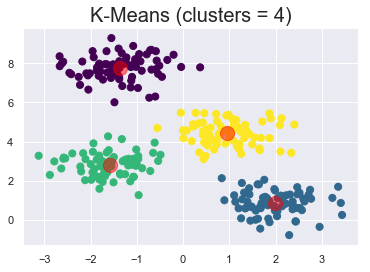

In [15]:
draw(m_kmeans,X,y_pred,4)

## 3.2 K-Means++
为了初始值足够离散，我们选择相距较远的点成为质心

### 3.2.1 K-Means++聚类步骤

- 1. 首先在数据集中，随机选取一点，作为第一个质心。
- 2. 然后迭代所有点，把所有点到该簇中心的最短距离算出（当有n个质心时，最短距离取n个距离的最小值）
- 3. 选取距离较大的点作为新的质心
- 4. 重复2和3直到选择出K个质心
- 5. 用这k个质心作为初始化质心去运行标准的K-Means算法

### 3.2.2 代码实现

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [19]:
# X 创建300个随机坐标，范围是[-6,6]
X=(np.random.rand(300,2)*12)-6
# Y 创建300个随机坐标，范围是[0,1]
y=np.random.randint(0,2,size=(300,1))
#plt.scatter(X[:, 0], X[:, 1], s=50);

#### 3.2.2.1  k-means实现

[[ 2.87269719 -3.55992419]
 [ 2.21813913  3.08729214]
 [-3.23580435 -0.18981553]]
Calinski-Harabasz score：248.378372
迭代次数：8


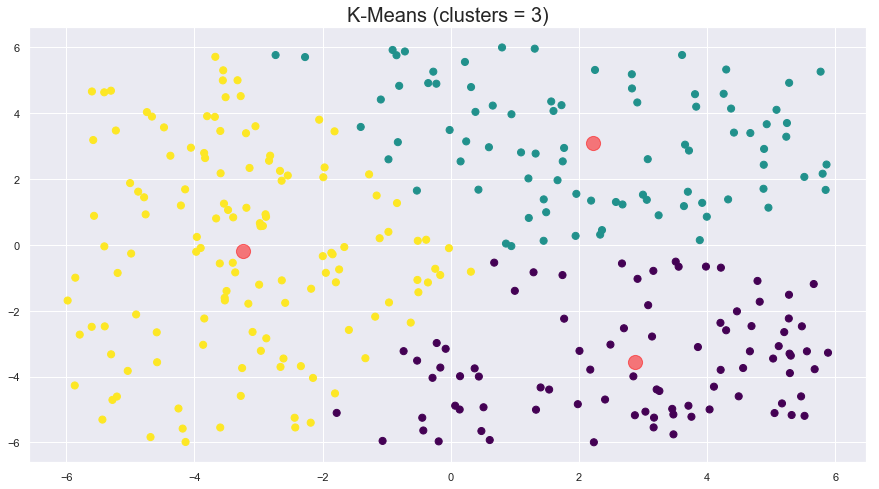

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
# 分3个质心，初始质心方法为随机，随机数种子为0
kmeans = KMeans(n_clusters=3,init='random',random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
draw(kmeans,X,y_pred,3)
print("迭代次数：%d"%kmeans.n_iter_)

#### 3.2.2.2  k-means++实现

[[-3.23580435 -0.18981553]
 [ 2.21813913  3.08729214]
 [ 2.87269719 -3.55992419]]
Calinski-Harabasz score：248.378372
迭代次数：18


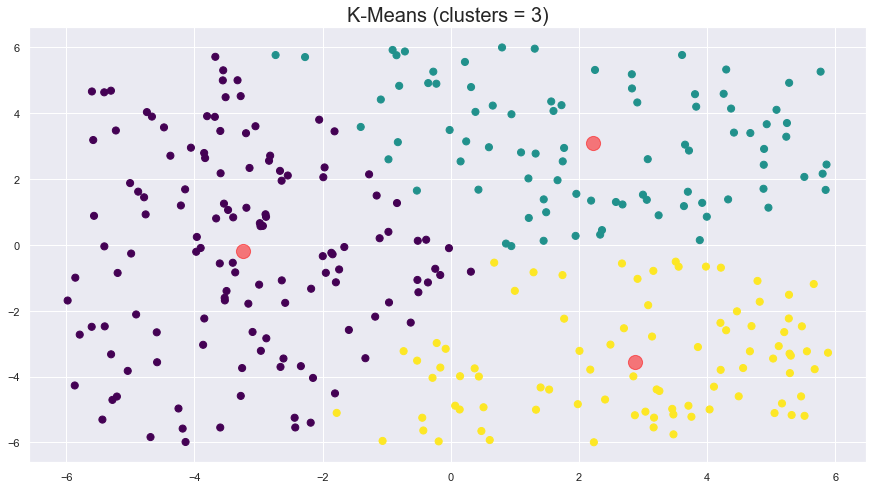

In [22]:
# 分3个质心，初始质心方法为K-Means++
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X)
y_pred = kmeans.predict(X)
draw(kmeans,X,y_pred,3)
print("迭代次数：%d"%kmeans.n_iter_)
# 质心坐标
# print(kmeans.cluster_centers_)

# 4 密度聚类

## 4.1 Mean Shift算法
### 4.1.1 算法原理

#### 4.1.1.1 例子
像一群具有挑战精神的登山者去攀爬一座山脉，山脉有着很多个山峰，而登山者随机分布在山脉的任何地方，登山者会选择最该块区域最陡峭的方向进行攀爬，直到所有的登山者都爬上了邻近的山峰（局部最优点），山峰的个数也就是簇的个数，这就是Mean Shift算法的基本思想。

#### 4.1.1.2 算法概念
Mean Shift算法是一种无参密度估计算法或称核密度估计算法，
可用于聚类、图像分割、跟踪等，Mean shift是一个向量，它的方向指向当前点上概率密度梯度的方向。
所谓的核密度评估算法，指的是根据数据概率密度不断移动其均值质心（也就是算法的名称Mean Shift的含义）直到满足一定条件。


![pic_3](pic_3.gif) 

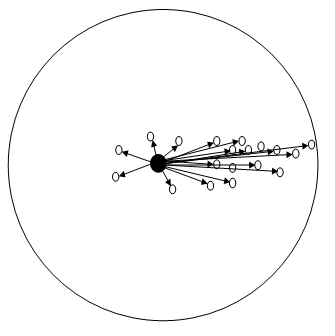
其中，Sh(x)指的是一个半径为h的高维球区域，如上图中的圆形区域。Sh(x)的定义为：
$$S_h(x)=(y \mid (y-x)( y-x)^T \leqslant h^2)$$
里面所有点与圆心为起点形成的向量相加的结果就是Mean shift向量。

#### 4.1.1.3 算法步骤

- (1)在未被标记的数据点中随机n个点作为n个聚类的**起始中心点center**
- (2)找出以center为中心，半径为radius的区域中出现的所有数据点，认为这些点同属于一个聚类C。同时将在该聚类中数据点的访问频率加1。
- (3)以center为中心点，计算center点到集合M中每个数据点的向量之和，得到向量shift。

**注: Mean Shift向量**
对于给定的d维空间 $R^d$ 中的n个样本点$x_i,i=1,⋯,n$
则对于点x，其Mean Shift向量的基本形式为：

$$M_h(x)=\frac{1}{k}\sum_{x_i\in S_h}(x_i-x)$$

- (4) **center点沿着shift的方向移动**，移动距离是||shift||, 符号表达式为: center = center + shift。

- (5) **迭代**: 重复步骤2、3、4，直到shift的很小（就是迭代到收敛），记住此时的center。注意，这个迭代过程中遇到的点都应该归类到簇C

- (6) 如果收敛时当前簇C的center与其它已经存在的簇C2中心的距离小于阈值，那么把C2和C合并，数据点出现次数也对应合并。否则，把C作为新的聚类。

- （7）重复1、2、3、4、5直到所有的点都被标记为已访问。
- （8）分类：根据每个类，对每个点的访问频率，取访问频率最大的那个类，作为当前点集的所属类。

**示例**
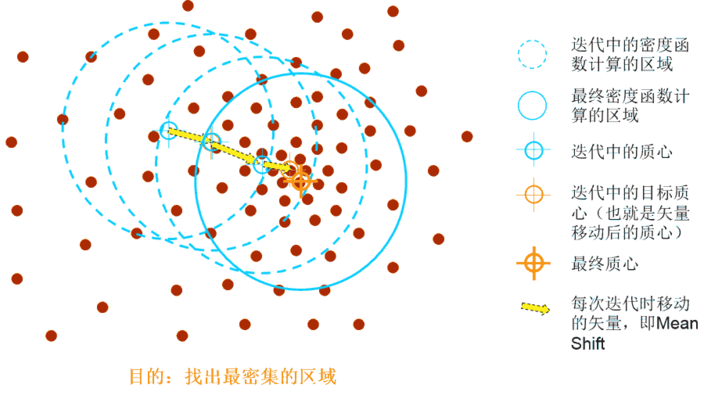

### 4.1.2 代码实现

In [1]:
import numpy as np
import pandas as pd
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
# X 创建300个随机坐标，范围是[-6,6]
X=(np.random.rand(300,2)*12)-6
# Y 创建300个随机坐标，范围是[0,1]
y=np.random.randint(0,2,size=(300,1))
#plt.scatter(X[:, 0], X[:, 1], s=50);

模型的bandwidth参数（bandwidth为高维球区域的半径）

In [3]:
from sklearn.cluster import estimate_bandwidth
# 通过下列代码可自动检测bandwidth值
# 从data中随机选取100个样本，计算每一对样本的距离，然后选取这些距离的0.2分位数作为返回值，当n_samples很大时，这个函数的计算量是很大的。
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)
print("bandwidth：",bandwidth)

bandwidth： 3.4671488859543973


In [4]:
from sklearn.cluster import MeanShift
"""
    MeanShift(bandwidth=3.0723913799161027, bin_seeding=True, cluster_all=True,
             min_bin_freq=1, n_jobs=1, seeds=None)
        Parameters:
            bandwidth : RBF内核里面的边界宽度
            seeds : 初始化内核的种子
            bin_seeding : 是否将所有的样本点作为簇中心
            min_bin_freq :只接受min_bin_freq的点作为种子，以加速算法
            cluster_all : 是否将所有数据点都分配到簇中，false表示将独立点进行独立（-1）
            n_jobs : 并行计算数
        Attributes：
            cluster_centers_ : 簇中心点坐标
            labels_ : 每个点的标签
"""
# bin_seeding设置为True就不会把所有的点初始化为核心位置，从而加速算法
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
# 计算类别个数
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
 
print("number of estimated clusters : %d" % n_clusters)

number of estimated clusters : 3


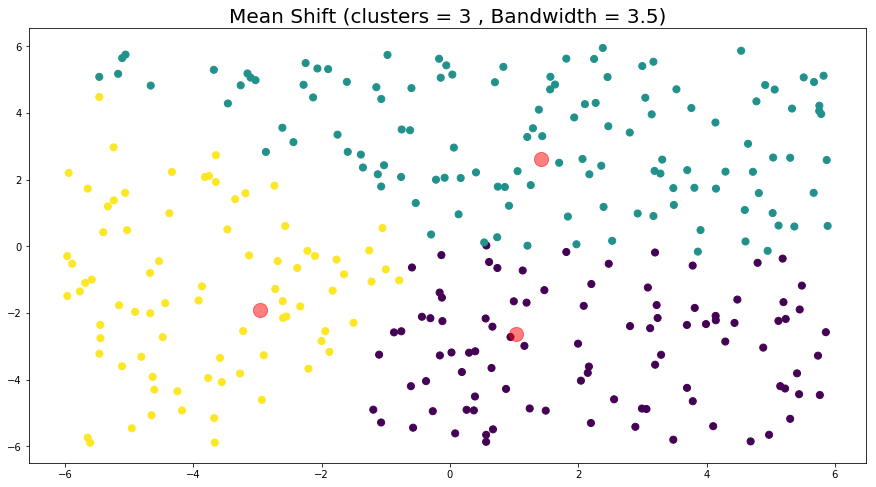

In [5]:
import matplotlib.pyplot as plt
from itertools import cycle
from scipy.spatial.distance import cdist

pylab.rcParams['figure.figsize'] = (15.0, 8.0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#画出聚类中心
centers = cluster_centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

plt.title("Mean Shift (clusters = %d , Bandwidth = %.1f)"%(n_clusters,bandwidth),fontsize=20);
plt.show()

## 4.2 DBSCAN算法

**基本思想**:如果一个点p和另一个点q是密度相
连的，则p和q属于同一个簇。

### 4.2.1 相关的概念

- **邻域**:p点的r邻域
    $$N_{r}(p)={ q | q属于D 且 dist(p,q)<=r }$$

- **核心点**: 邻域中至少包含minpts个点(含中心点自身)

- **出发密度可达**

- **密度相连关系**

- **基于密度的簇**: 连通性,极大性

### 4.2.2 dbscan算法思想 

- 首先选取一个未标记类别的核心点，并创建一个新簇；
- 然后，寻找所有从该核心点出发关于ε和MinPts
- 密度可达的点，并标记为该簇。
- 重复这个过程，直至处理完所有点，即没有未标记簇的核心点

```伪代码
输入： 数据集D，邻域半径ε，最小点数MinPts
输出： 关于（ε， MinPts）的所有簇的集合
方法： 其过程描述如下：
do
{ 从数据集D中抽取一个未处理过的点p;
if (p是核心点)
找出所有从p出发关于（ε， MinPts）密度可达的点，形成一
个簇;
else
p是边界点或噪声点（非核心点），跳出本次循环，寻找下一
点；
} until (所有点都被处理);
```

- **优点**是基于密度定义，相对抗噪音，能处理任意形状和大小的簇。
- **缺点** 是对参数（ε， MinPts）敏感，当簇的密度变化太大时，会产生较大误差。

### 4.2.3 dbscan的算法思想2

- DBSCAN是一种基于密度的聚类算法，这类密度聚类算法一般假定类别可以通过样本分布的紧密程度决定。同一类别的样本，他们之间是紧密相连的，也就是说，在该类别任意样本周围不远处一定有同类别的样本存在。
- 通过将紧密相连的样本划为一类，这样就得到了一个聚类类别。通过将所有各组紧密相连的样本划为各个不同的类别，则我们就得到了最终的所有聚类类别结果.
- DBSCAN的两个重要参数:
    - 参数(ϵ, MinPts)用来描述邻域的样本分布紧密程度。
    - ϵ 描述了某一样本的邻域距离阈值，MinPts描述了某一样本的距离为ϵ的邻域中样本个数的阈值。

### 4.2.4 代码实现1

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [7]:
# X 创建300个随机坐标，范围是[-6,6]
X=(np.random.rand(300,2)*12)-6
# Y 创建300个随机坐标，范围是[0,1]
y=np.random.randint(0,2,size=(300,1))
#plt.scatter(X[:, 0], X[:, 1], s=50);

In [44]:
"""
    DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None,
            algorithm='auto', leaf_size=30, p=None, n_jobs=1)
        Parameters:
            eps : 两个样本之间的最大距离
            min_samples : 点的邻域中的样本数
            metric : 特征数组中计算两个实例之间的距离的矩阵
            metric_params：最近邻距离度量参数。
            algorithm : 计算最近邻点的算法
            leaf_size :  BallTree 或 cKDTree 的叶子数量
            p : 最近邻距离度量参数
            n_jobs : 并行任务数
        Attributes：
             core_sample_indices_ : 核心样本的索引
             components_ : 通过训练获得核心样本的副本
             labels_ : 聚类标签
"""
dbsc = DBSCAN(eps = .5, min_samples = 6).fit(X)

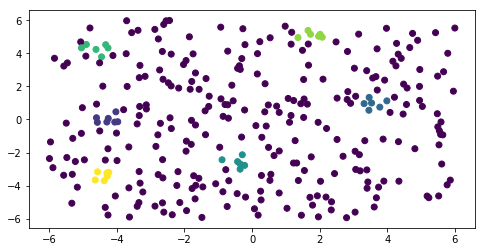

In [45]:
y_true = dbsc.labels_
plt.scatter(X[:,0],X[:,1],c=y_true)
plt.show()

### 4.2.4 代码实现1

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 4.0)

In [29]:
from sklearn.datasets import make_moons
# moons_X:数据 moon_y: 标签
moons_X, moon_y = make_moons(n_samples = 2000)
print(moons_X.shape)
print(moon_y.shape)

(2000, 2)
(2000,)


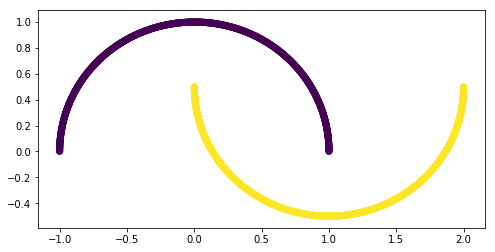

In [30]:
plt.scatter(moons_X[:,0],moons_X[:,1],c=moon_y,cmap='viridis')

In [33]:
def add_noise(X,y, noise_level = 0.01):
    #噪声数据点个数
    amt_noise = int(noise_level*len(y))
    #随机产生
    idx = np.random.choice(len(X), size = amt_noise)
    #将噪声点加入数据集
    noise = np.random.random((amt_noise, 2) ) -0.5
    X[idx,:] += noise
    return X 

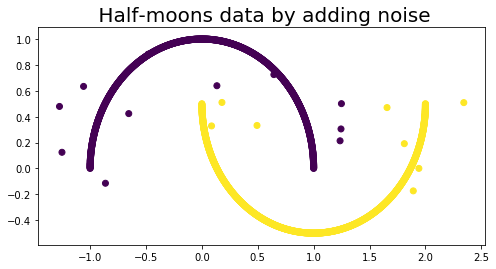

In [34]:
add_noise(moons_X,moon_y)
plt.scatter(moons_X[:,0],moons_X[:,1],c=moon_y,cmap='viridis')
plt.title(" Half-moons data by adding noise",fontsize=20);

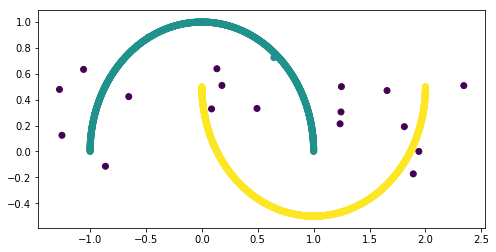

In [39]:
dbsc = DBSCAN(eps = .05, min_samples = 3).fit(moons_X)
y_true = dbsc.labels_
plt.scatter(moons_X[:,0],moons_X[:,1],c=y_true)
plt.show()

## 4.3 OPTICS算法
- 点的核心距离:
    - 输入:点,包含点数量
    - 条件: 点为核心点
    - 输出距离阈值(最小值)
- 表示点的特征不一样,地位不一样
- 可达距离:
    - p关于o的可达距离: o的核心距离, po的距离, 取最大值
    - o是核心点
- 簇排序:
    - 可达距离排序
        - 核心点的可达距离是核心距离
        - 邻域范围内的点的可达距离是核心距离
        - 邻域外的点可达距离, 是op的距离
    - 每个点的属性:
        - 他的核心点
        - 他到核心点的可达距离